In [17]:
import os.path

import numpy as np

from notebooks.analytics.utils import init_analysis, savefig

In [12]:
#EXP_NAME = "daeclust_mnist_fmnist_01-balanced-clusters" # no popularity
#EXP_NAME = "daeclust_mnist_fmnist_02-balanced-clusters" # with popularity
#EXP_NAME = "daeclust_mnist_fmnist_03-balanced-clusters" #
#EXP_NAME = "daeclust_mnist_fmnist_04-balanced-clusters" # fixed std (2) using median
#EXP_NAME = "daeclust_mnist_fmnist_05-balanced-clusters" # fixed std, std tolerance 3
EXP_NAME = "daeclust_mnist_fmnist_06-balanced-clusters" # fixed std, std tolerance 0

df = init_analysis(EXP_NAME)

C:\Users\micdu\AppData\Local\Temp\ipykernel_16156\3018674583.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  loss_plot_fig.show()


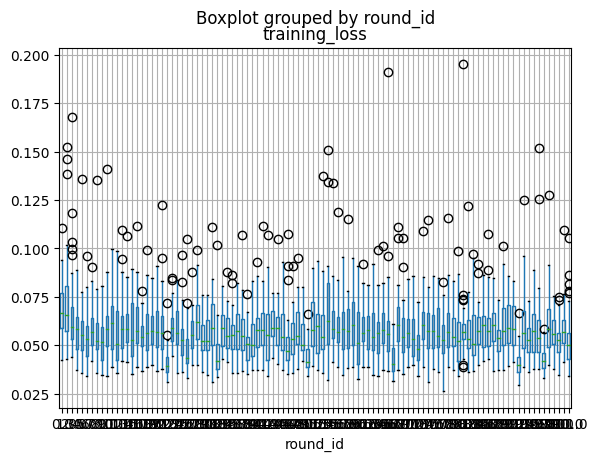

In [13]:
loss_plot_ax = df.boxplot("training_loss", by="round_id")
loss_plot_fig = loss_plot_ax.get_figure()
savefig(loss_plot_fig, "training_loss")
loss_plot_fig.show()

In [14]:
dataset_perf = df.groupby(["round_id","dataset"])
dataset_perf["validation_loss"].mean()

round_id  dataset
0.0       fmnist     0.056158
          mnist      0.072195
1.0       fmnist     0.053725
          mnist      0.078500
2.0       fmnist     0.060032
                       ...   
99.0      mnist      0.054087
100.0     fmnist     0.047592
          mnist      0.062366
101.0     fmnist     0.047358
          mnist      0.053575
Name: validation_loss, Length: 204, dtype: float64

C:\Users\micdu\AppData\Local\Temp\ipykernel_16156\3304035797.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cluster_count_fig.show()


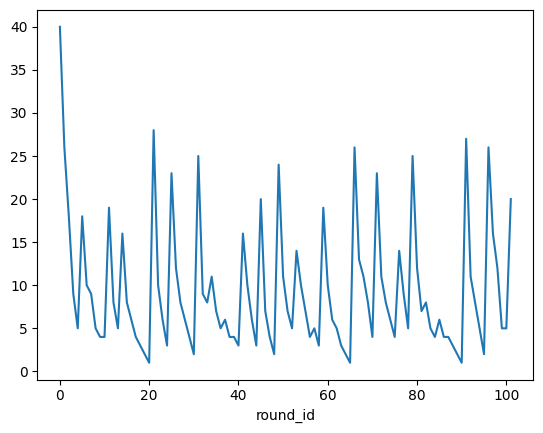

In [15]:
cluster_count_ax = df.groupby("round_id")["cluster_id"].nunique().plot()
cluster_count_fig = cluster_count_ax.get_figure()
savefig(cluster_count_fig, "cluster_count")
cluster_count_fig.show()

In [18]:
n_clusters = df.groupby("round_id")["cluster_id"].nunique()
loss = df.groupby("round_id")["validation_loss"].mean()

np.corrcoef(loss, n_clusters)

array([[ 1.       , -0.3564786],
       [-0.3564786,  1.       ]])

In [22]:
np.corrcoef(loss[1:], n_clusters[:len(n_clusters)-2])

array([[1.        , 0.48714609],
       [0.48714609, 1.        ]])